# Introduction
The objective of this project is to examine and investigate the correlation between the economic output of a country and the Life expectancy of it's citizens in a list of 6 countries.

The goalposts set for this project is to examine, clean and organize the data followed by an in-depth analysis with plots and graphic visualizations of such.

The questions this project seeks to answer are the following:

* What is the average life expectancy in the six nations?
* What is the distribution of life expectancy and GDP among these nations?
* Has the life expectancy increased in the six nations?
* is there a correlation between a nation and it's life expectancy?
* Has GDP increased in the six nations?
* Is GDP strongly correlated to a highier life expectancy?

**Data Sources**
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)





## Importing Libraries
To help us visualize the data, we'll be using the following modules:

In [4]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import pandas as pd 
import scipy.stats as sts
import warnings
warnings.filterwarnings('ignore')

Setting the context of the visualization to provide an adecuate representation of data.

In [2]:
sns.set_context('notebook')
sns.set_style('darkgrid')
#cb_p = sns.set_palette('colorblind')

## Loading the data and first insights
Using the `pandas` module, we import the data from an arranged csv file named `all_data.csv`.

In [19]:
df = pd.read_csv('all_data.csv')

We then proceed to rename the columns for easy tabulation and autofill. 

We then show the resulting DataFrame.

In [70]:
df.rename(columns = {'Country': 'country',
                     'Year': 'year',
                     'Life expectancy at birth (years)': 'life_expectancy', 
                     'GDP': 'gdp'},
          inplace = True)

df.gdp.to_frame().head(15)

,gdp
0,7.786093e+10
1,7.097992e+10
2,6.973681e+10
3,7.564346e+10
4,9.921039e+10
5,1.229650e+11
6,1.547880e+11
7,1.736060e+11
8,1.796380e+11
9,1.723890e+11


After showing the unique years in the database we see we have a timelapse of 15 years for each country and a total of 6 countries.

In [22]:
print(df.year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [28]:
print(df.country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The handy method `.info()` gives us a better look at the total dimensions of the DataFrame and the types of variables present in the data. We can see there is a total of 4 variables present in this DataFrame, 2 categorical variables (`year`, `country`) and 2 quantitative variables (`life_expectancy`, `gdp`).  

Looking at the DataFrame above we see that this data is tidy, so no further cleaning should be made.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Exploratory plottings

To start we are going to examine the distribution of the data using `sns.hist()` to create a histogram of the data in question

We see that the GDP of the data is extremely right-skewed, almost in a zipf's law or power law fashion. This type of distributions are very common among populations.

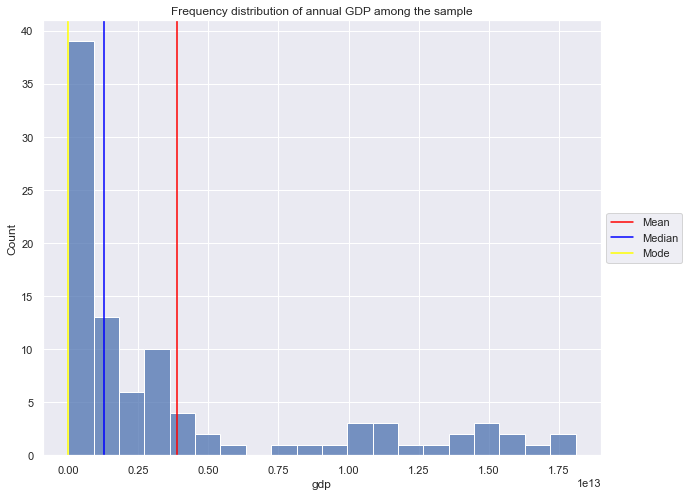

In [73]:
m, c = sts.mode(df.gdp)
sns.set()
plt.figure(figsize=(10,8))
sns.histplot(df.gdp, bins=20, kde=False)
plt.axvline(np.mean(df.gdp), color = 'red', label = 'Mean')
plt.axvline(np.median(df.gdp), color='blue', label = 'Median')
plt.axvline(m, color='yellow', label='Mode')
plt.title('Frequency distribution of annual GDP among the sample')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

The next distribution examined was `life_expectancy`. This distribution tells almost a exact opposite story of the GDP distribution; it is left-skewed and has some outliers in the smallest figures. A further look might also identify different modes or smaller groupings of distributions within the range. 

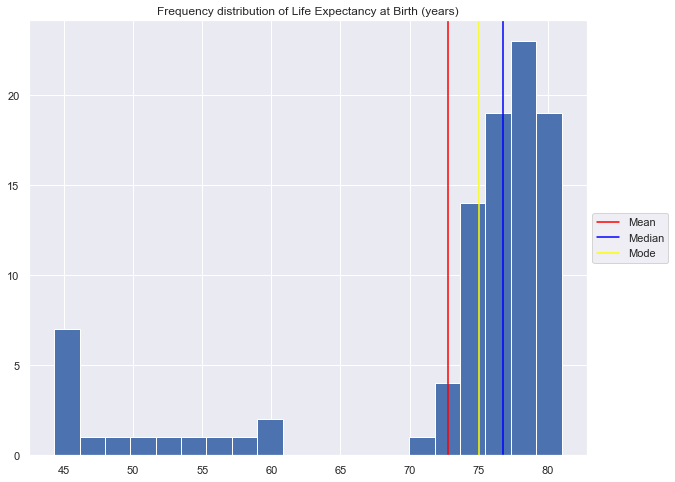

In [76]:
leaby = df.life_expectancy
m, c = sts.mode(leaby)
sns.set()
plt.figure(figsize=(10,8))
plt.hist(leaby, bins=20)
plt.axvline(np.mean(leaby), color='red', label = 'Mean')
plt.axvline(np.median(leaby), color='blue', label = 'Median')
plt.axvline(m, color='yellow', label='Mode')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Frequency distribution of Life Expectancy at Birth (years)')
plt.show() 

The previous plots did not break down the whole dataset and we did not infer much about how the data behaved among the different countries or years, our next step will be to classify and breakdown the data by country.

In [8]:
df_average = df.drop('year', axis=1).groupby('country').mean().reset_index()
df_average.head()

,country,life_expectancy,gdp
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13


### Barplots 

Now that the data is distributed by country we will be plotting the averages for `life_expectancy` and `gdp`.

It seems the Life Expectancy for all countries listed in this dataset ranges from low to high 70's except for Zimbabwe with an average life expectancy in the low 50's.

For the GDP it seems that the United States is several powers of magnitude above the rest of the countries listed in the database, Zimbabwe is not even visible in the barplot and Chile is barely seen. After the US, China, Germany, and Mexico seem to have relatively high GDPs.

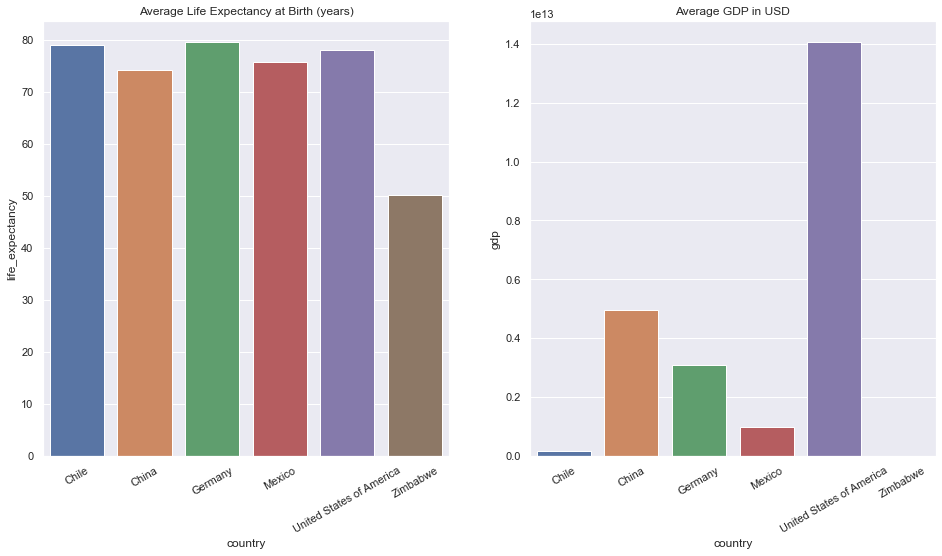

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0] = sns.barplot(ax=axes[0], x = 'country', y = 'life_expectancy', data = df_average)
axes[0].set_xticklabels(df_average.country, rotation=30)
axes[0].set_title('Average Life Expectancy at Birth (years)')

axes[1] = sns.barplot(ax = axes[1], x = 'country', y = 'gdp', data = df_average)
axes[1].set_xticklabels(df_average.country, rotation=30)
axes[1].set_title('Average GDP in USD');

### Violinplots and Boxplots

Another way to compare data is to visualize the distributions of each and to look for patterns in the shapes.

The violin plot is a popular choice because it can show the shape of the distribution compared to the box plot. Below, country is on the x-axis and the distribution of numeric columns : `gdp` and `life_expectancy` are on the y axis. 

In the `gdp` plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges. 

In the `life_expectancy` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s. In this plot a boxplot was used since violin plots were not helpoing grasp a clear representation of the data.

For reference: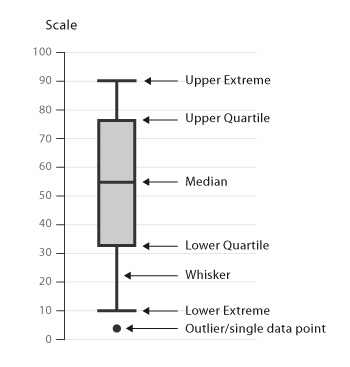

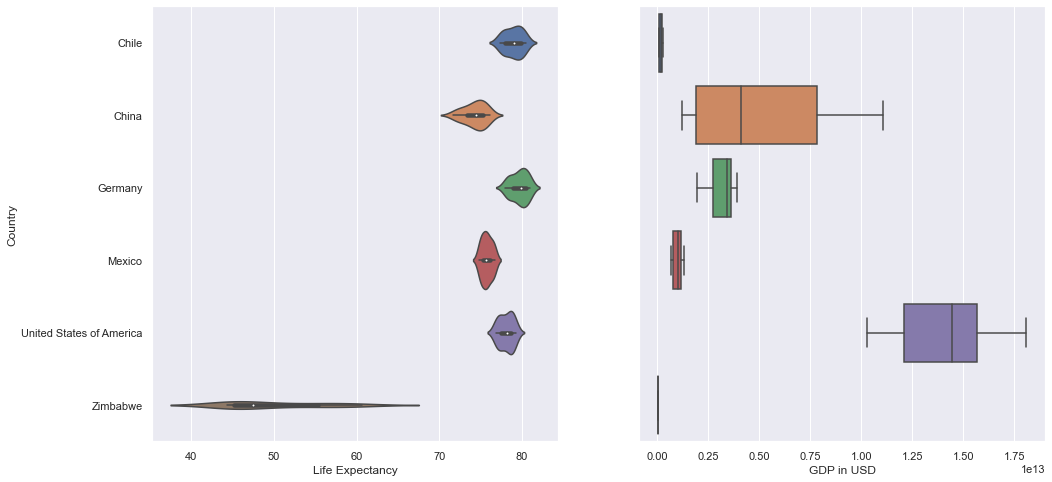

In [84]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize =(16, 8))
axes[0] = sns.violinplot(ax = axes[0], x = 'life_expectancy', y = 'country', data = df)
axes[0].set_ylabel('Country')
axes[0].set_xlabel('Life Expectancy')
axes[1] = sns.boxplot(ax = axes[1], x = 'gdp', y = 'country', data = df)
axes[1].set_xlabel('GDP in USD')

plt.ylabel('');

### Lineplots

Next the data will explore `gdp` and `life_expectancy` over the years through line charts. Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not experience similar growth rates. In this graph as in previous ones, The US GDP growth is several orders of magnitude highier than those of Chile or Zimbabwe, making it difficult to record a significant growth over the years.

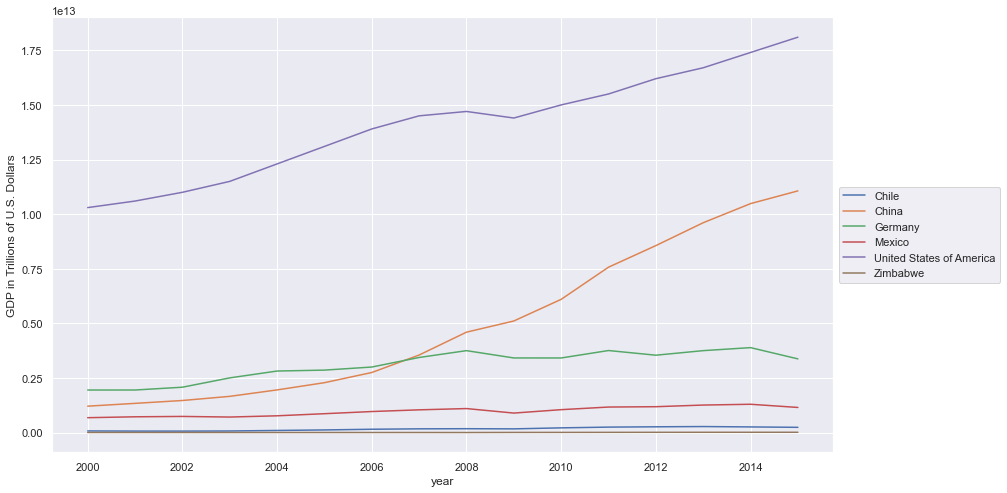

In [11]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year', y='gdp', hue='country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

An aspect that was looked more into depth was the faceted line charts by Country. In the individual plots, each country has their own y axis, which makes it easier to compare the shape of their `gdp` over the years without the same scale. This method makes it easier to see that all of the countries have seen increases. In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000.

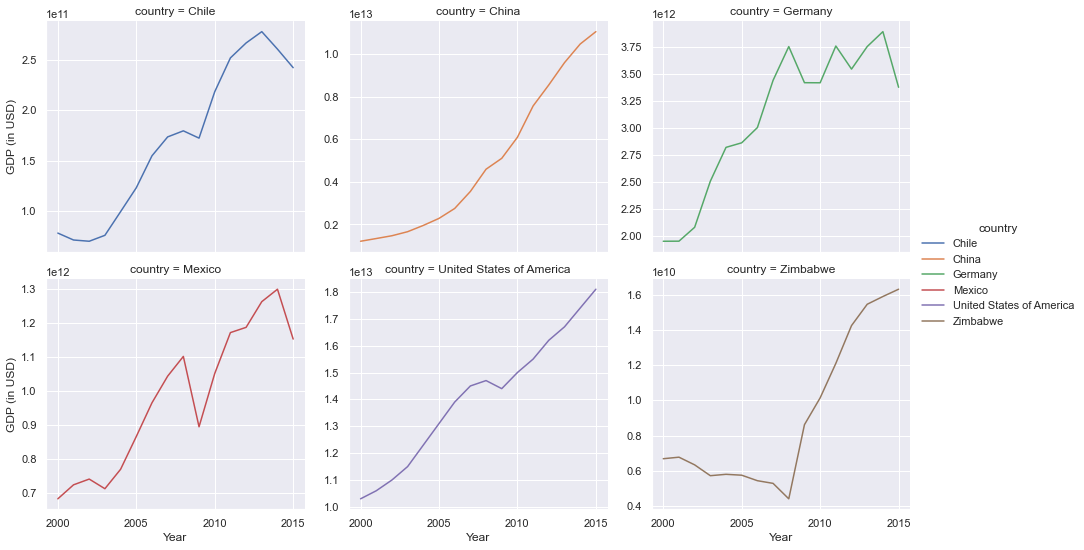

In [111]:
g = sns.FacetGrid(df, col="country",col_wrap=3, hue = "country", sharey = False, height = 3.9, aspect = 10/9)

g.map(sns.lineplot,"year","gdp")\
    .add_legend()\
    .set_axis_labels("Year","GDP (in USD)")
g.set(xticks = [2000, 2005, 2010, 2015])
g.legend.set_label(['China'])
g;

Our next step in our visualization is to plot `life_expectancy` over time. Our 

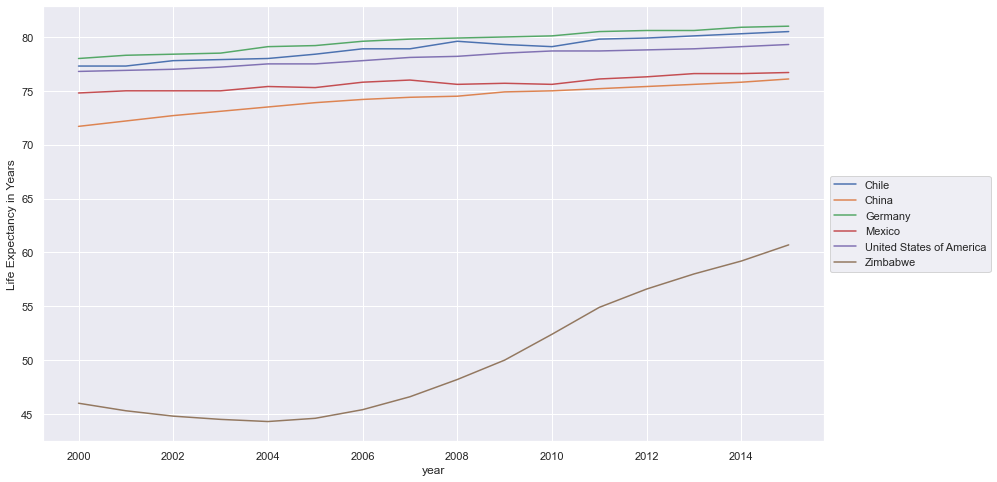

In [13]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year', y='life_expectancy', hue='country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life Expectancy in Years");

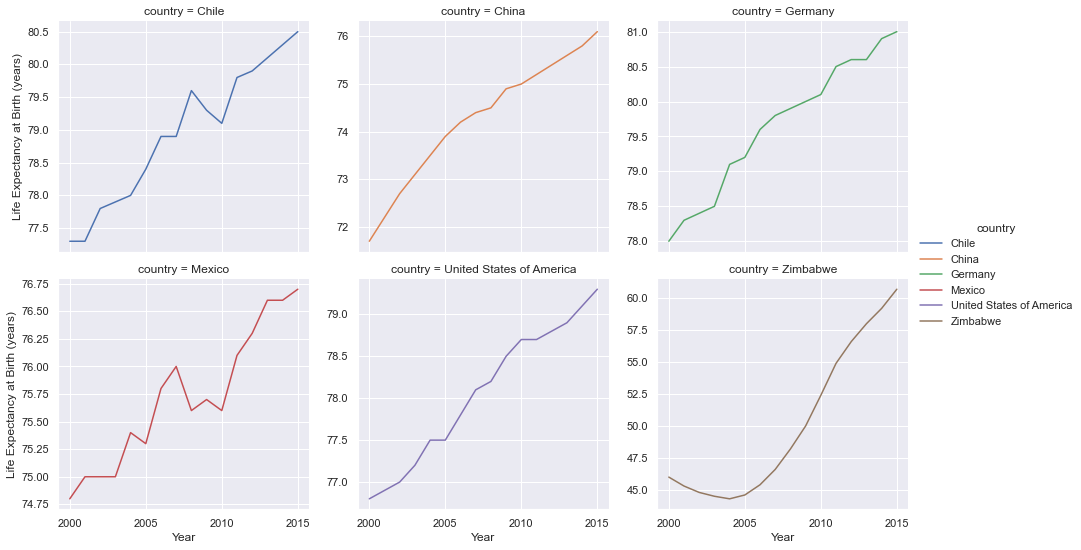

In [54]:
g = sns.FacetGrid(df, col="country",col_wrap=3, hue = "country", sharey = False, height = 3.9, aspect = 10/9)

g.map(sns.lineplot,"year","life_expectancy").add_legend().set_axis_labels("Year","Life Expectancy at Birth (years)")
g.set(xticks = [2000, 2005, 2010, 2015])

g;

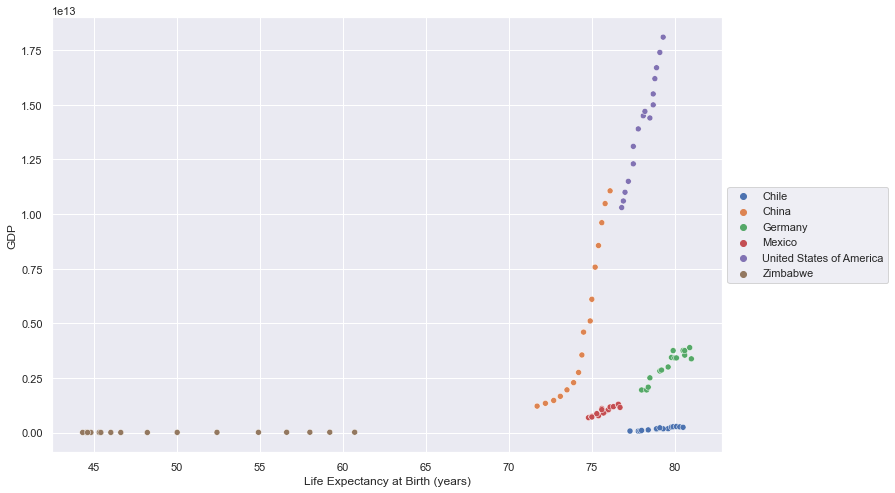

In [15]:
plt.figure(figsize=(12, 8))
g = sns.scatterplot(data=df, x='life_expectancy', y='gdp', hue='country')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('GDP')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

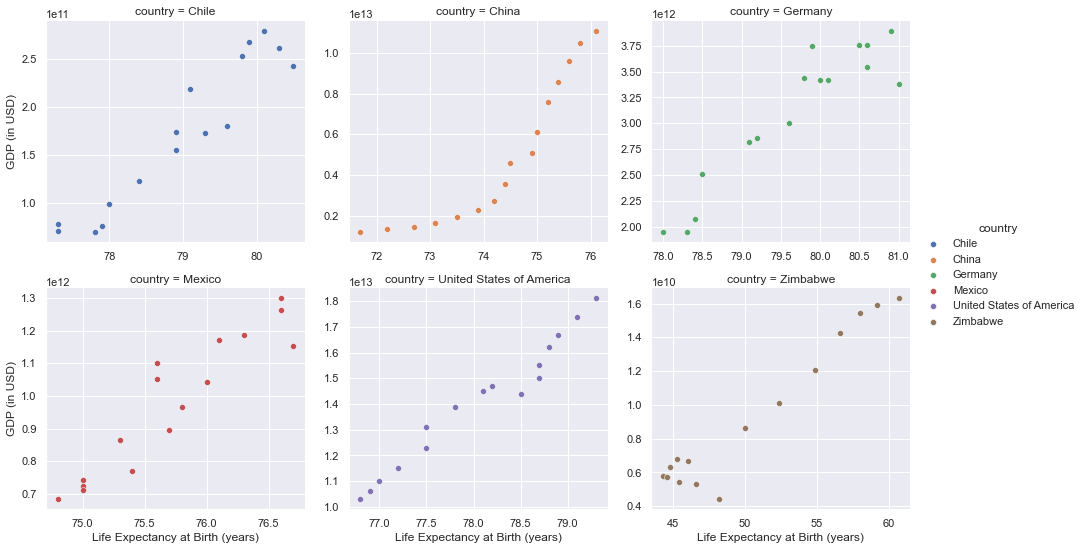

In [58]:
g = sns.FacetGrid(df, col="country",col_wrap=3, sharey=False, sharex=False, hue = "country", height = 3.9, aspect = 10/9)

g.map(sns.scatterplot, "life_expectancy", "gdp")
g.add_legend().set_axis_labels("Life Expectancy at Birth (years)","GDP (in USD)")

g;

['#0173B2',
 '#DE8F05',
 '#029E73',
 '#D55E00',
 '#CC78BC',
 '#CA9161',
 '#FBAFE4',
 '#949494',
 '#ECE133',
 '#56B4E9']

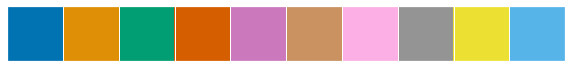

In [63]:
sns.palplot(sns.color_palette('colorblind', as_cmap=True))
c = sns.color_palette('colorblind', as_cmap=True)
c

In [2]:
def sinplot(size=None):
    if size is None:
        size = (16, 8)
    x = np.linspace(0, 14, 100)
    plt.figure(figsize =(16, 8))
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))
        

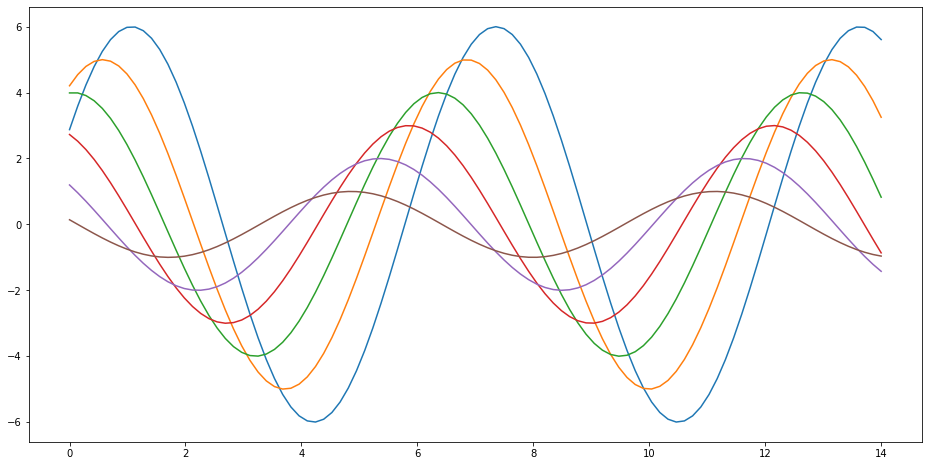

In [14]:
sinplot()